In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

The expression `df.isnull().mean() * 100` is used to find the **percentage of missing values** in each column of a data table (or DataFrame).

Here’s how it works, step by step:

1. **Identify Missing Values**: First, it checks each cell in the data table to see if it’s missing (empty or `NaN`). If a value is missing, it’s marked as `True`; if not, it’s marked as `False`.

2. **Calculate the Proportion of Missing Values**: Next, it looks at each column and calculates how many of these `True` markers (missing values) there are compared to the total number of values in that column. This gives a decimal number between 0 and 1, representing the **proportion of missing values** in each column.

3. **Convert to Percentage**: Finally, it multiplies this proportion by 100 to get a **percentage**. So, if a column has 0.5 as the proportion, multiplying by 100 gives 50%, meaning 50% of the values in that column are missing.

The result is a list showing the percentage of missing values for each column in the data table, which is helpful to understand how complete or incomplete each column is.

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15053,0.910,no_enrollment,Graduate,20.0,14.0
8041,0.878,no_enrollment,Masters,0.0,70.0
11482,0.827,no_enrollment,High School,20.0,44.0
6941,0.884,no_enrollment,Graduate,15.0,54.0
14164,0.926,Full time course,Graduate,12.0,224.0


In [8]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [9]:
new_df = df[cols].dropna()
new_df.shape,df.shape

((17182, 5), (19158, 13))

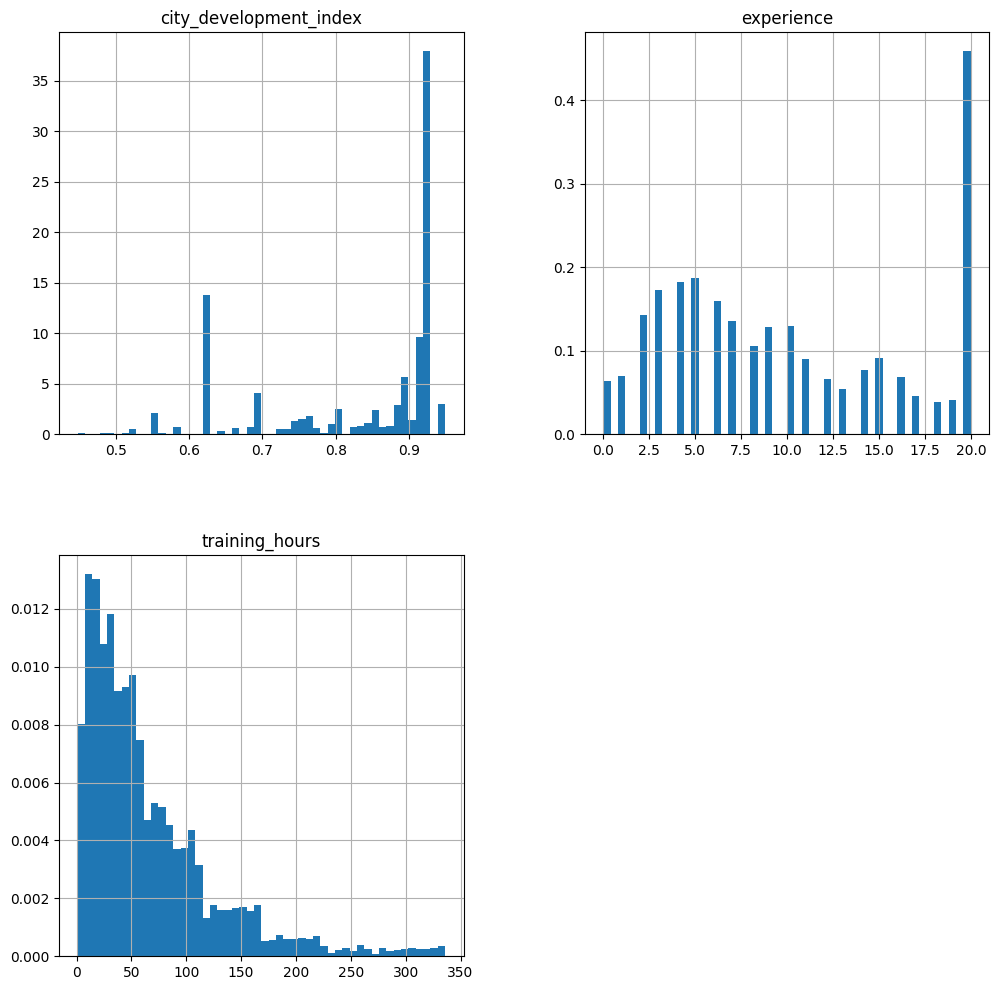

In [10]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

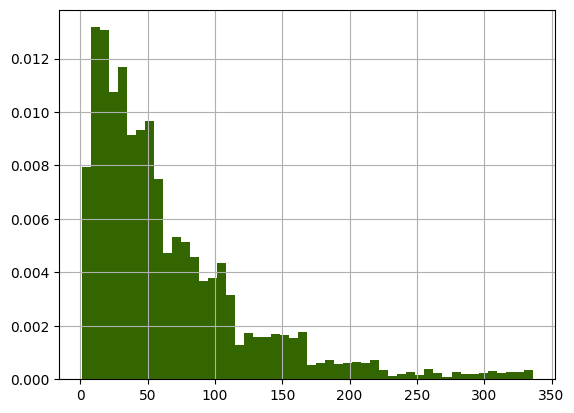

In [11]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['training_hours'].hist(bins=50,ax=ax,density=True, color='r')

##new data  ##aplha = color transperancy
df['training_hours'].hist(bins=50,ax=ax,density=True,color='g',alpha=0.8)

<Axes: ylabel='Density'>

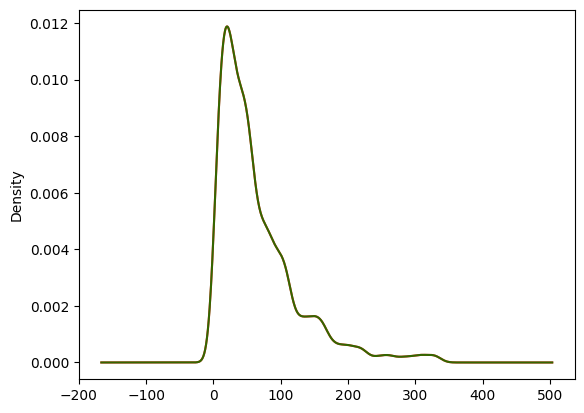

In [12]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['training_hours'].plot.density( color='r')

##new data  ##aplha = color transperancy
df['training_hours'].plot.density(color='g',alpha=0.8)

<Axes: >

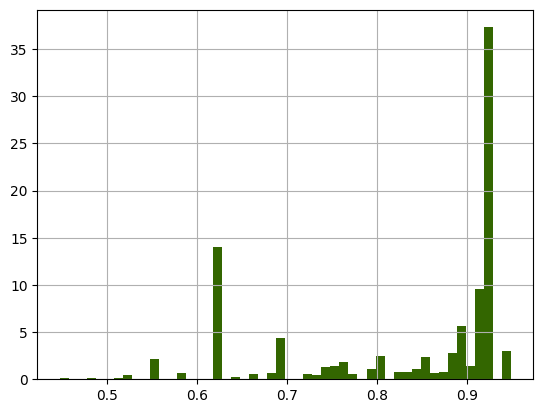

In [13]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['city_development_index'].hist(bins=50,ax=ax,density=True, color='r')

##new data  ##aplha = color transperancy
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='g',alpha=0.8)

<Axes: ylabel='Density'>

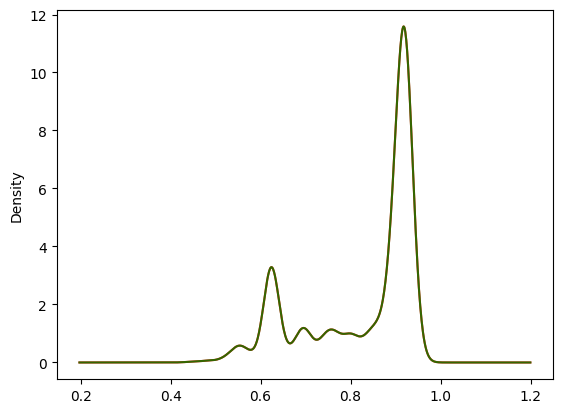

In [14]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['city_development_index'].plot.density( color='r')

##new data  ##aplha = color transperancy
df['city_development_index'].plot.density(color='g',alpha=0.8)

<Axes: >

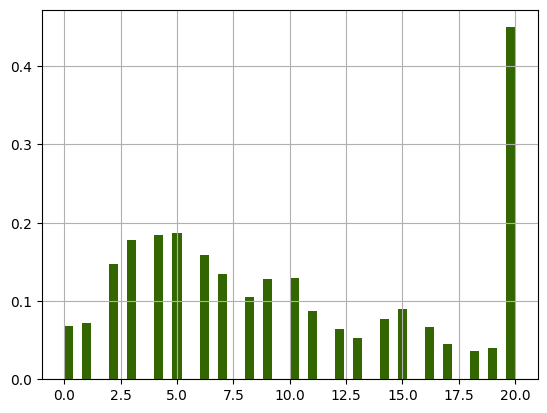

In [15]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['experience'].hist(bins=50,ax=ax,density=True, color='r')

##new data  ##aplha = color transperancy
df['experience'].hist(bins=50,ax=ax,density=True,color='g',alpha=0.8)

<Axes: ylabel='Density'>

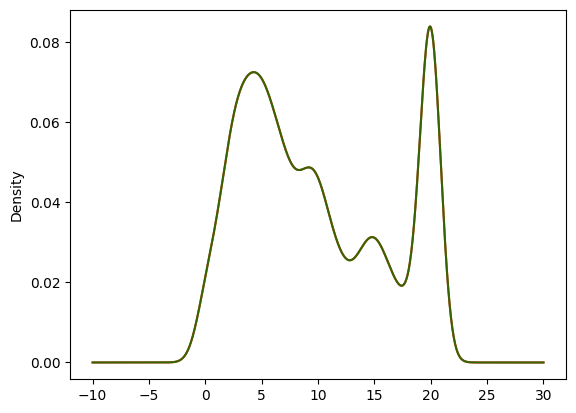

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111)

## original data
df['experience'].plot.density( color='r')

##new data  ##aplha = color transperancy
df['experience'].plot.density(color='g',alpha=0.8)

### Categorical data

In [17]:
temp = pd.concat([
    # percentage of observation per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observation per category, cca data
    new_df['enrolled_university'].value_counts() / len(df)
],axis=1)
# add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
enrolled_university,,
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


In [18]:
temp = pd.concat([
    # percentage of observation per category, original data
    df['education_level'].value_counts() / len(df),

    # percentage of observation per category, cca data
    new_df['education_level'].value_counts() / len(df)
],axis=1)
# add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
